# APIS 🧰


[The Public Holidays API](https://date.nager.at/swagger/index.html) provides public holiday information for approximately 90 countries.


## Your Task:
Please create a function called `holiday_api` that returns the US public holidays for a given year. 
- This function should have one argument: `year`

Once you have collected this data:
1. Import the `stocks` function we built yesterday and merge the holidays data with stocks data for the matching year.
2. Create a column called `'change'` that is the difference between the closing and opening stock prices.
3. Create a subplot containing two plots
    1. The top ten stock increases on inauguration day
    2. The top ten stock decreases on inauguration day
    
4. Move your `holiday_api` function into the data_collection.py file.

In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from src.data_collection import stocks

In [1]:
def holiday_api(year):
    us_holidays = requests.get(f'https://date.nager.at/Api/v1/Get/US/{year}').json()
    df = pd.DataFrame(us_holidays)
    df.date = pd.to_datetime(df.date)
    df.rename({'name': 'holiday_name'}, axis=1, inplace=True)
    return df[['holiday_name', 'date']]

In [32]:
sql = stocks(2017)
api = holiday_api(2017)

In [33]:
df = sql.merge(api, on='date', how='left')

In [34]:
df['change'] = df.close - df.open

In [36]:
inauguration = df[df.holiday_name == 'Inauguration Day']

/Users/joel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


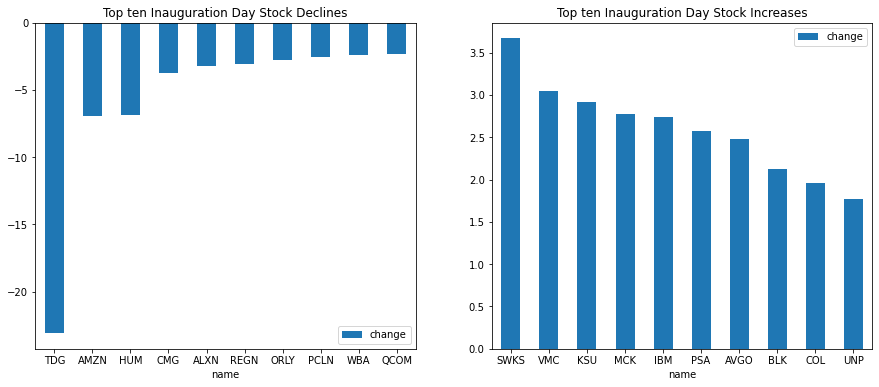

In [38]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
inauguration\
.sort_values(by='change')\
.head(10)\
.plot(x='name', y='change', ax=axes[0], kind='bar', rot=0)
axes[0].set_title('Top ten Inauguration Day Stock Declines')

inauguration\
.sort_values(by='change', ascending=False)\
.head(10)\
.plot(x='name', y='change', ax=axes[1], kind='bar', rot=0)
axes[1].set_title('Top ten Inauguration Day Stock Increases')
fig.show()



### Level Up

Create a function called `holiday_report` that outputs a subplot of the top ten stock increases and decreases for any holiday. This function should have one argument: `holiday`.

In [44]:
def asc_desc(df, column, top=10):
    return df.sort_values(by=column).head(10), df.sort_values(by=column, ascending=False).head(10)

def holiday_report(holiday):
    data = df[df.holiday_name == holiday]
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    asc, desc = asc_desc(df, 'change')
    asc.plot(x='name', y='change', ax=axes[0], kind='bar', rot=0)
    axes[0].set_title(f'{holiday} Stock Declines: Top ten')

    desc.plot(x='name', y='change', ax=axes[1], kind='bar', rot=0)
    axes[1].set_title(f'{holiday} Stock Increases: Top ten')
    fig.show()

/Users/joel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


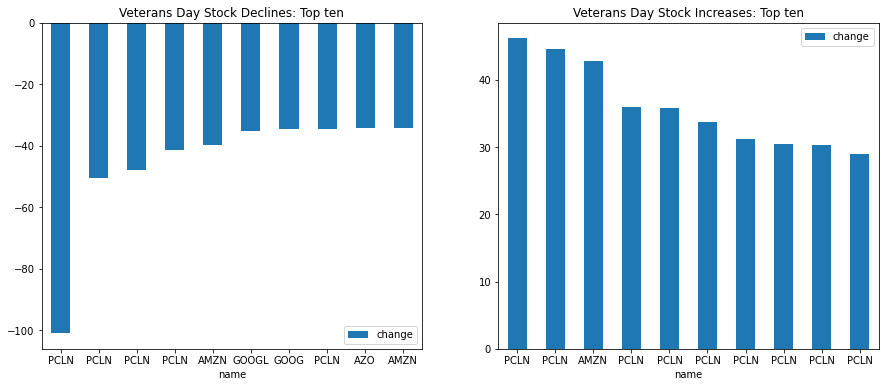

In [48]:
holiday_report('Veterans Day')